<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Amazon_Alexa_Review_RandomForest_Classifications_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Alexa Review Ratings Classification - Random Forest Algorithm


# Problem Statement

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variation and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perform sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

# Overview

1. From the exploratory data analysis, we know that 
  - the dataset is imbalanced.  
  - the ratings that are above 3 (including 3)have positive feedbacks, and all the ratings that are below 3 have negative feedbacks

2. Based on EDA, I predicted `feedback` by using `verified_review`, `variation`, and character length of `verified_review`. I attempted on predicting `rating` based on the same features.

3. I performed feature selection based on importance,  and I used only the top 5 most important features to train the model. The scores did not drop much when comparing to the model that uses all features.

# Task #1: Environment Set Up

In [266]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

# Task #2: Data Collection

In [267]:
df_alexa = pd.read_csv('https://raw.githubusercontent.com/niteen11/lagcc_data_analytics_micro_credential/master/Unit%204%20-%20Mahine%20Learning/amazon_alexa.tsv', sep='\t')


In [268]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [269]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [270]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [271]:
df_alexa['verified_reviews'] 

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

`verified_reviews` column contains many words (string)

# Task #3: EDA

##  **Imbalance dataset**
The dataset is imbalanced since we have 11 times more positive feedback than negative ones. That is there is about 91% of the data belong to positive feedback, and there is only 9% of the data belong to negative feedback. Since the dataset is imbalanced, we should not use accuracy to evaluate our models.   

In [272]:
# number of positive feedbacks 
sum(df_alexa['feedback']==1)

2893

In [273]:
# number of negative feedbacks 
sum(df_alexa['feedback']==0)

257

In [274]:
# ratio
2893/257 # 11:1

11.256809338521402

**We have many more positive review than negative ones**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


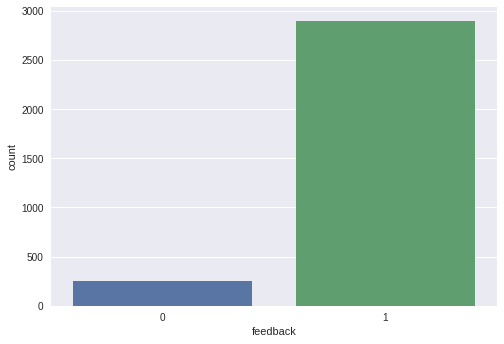

In [275]:
sns.countplot(df_alexa['feedback'], label = "Count") 

**We have many five star ratings, and some 4 star ratings. From the graph, we can see that all the ratings that are above 3 (including 3)have positive feedbacks, and all the ratings that are below 3 have negative feedbacks.** This suggested that there's strong correlation between the rating and feedback. 

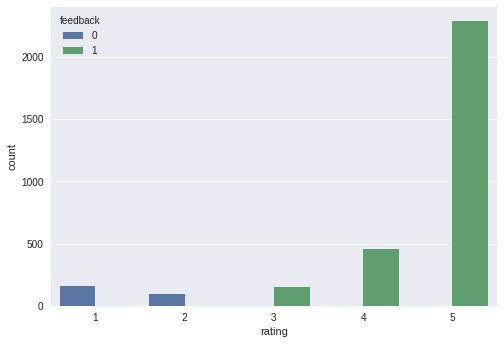

In [276]:
sns.countplot(x = 'rating', data = df_alexa, hue = 'feedback')

**About 73% of the data points have 5 star rating**

In [277]:
sum(df_alexa['rating']==5)/len(df_alexa)

0.7257142857142858

In [278]:
df_alexa.shape

(3150, 5)

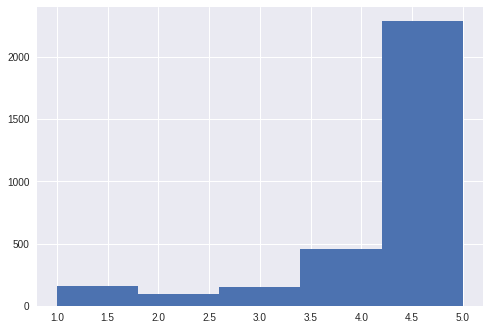

In [279]:
df_alexa['rating'].hist(bins = 5)

**The mean rating value are between 4 and 5 for all the product in the dataset**

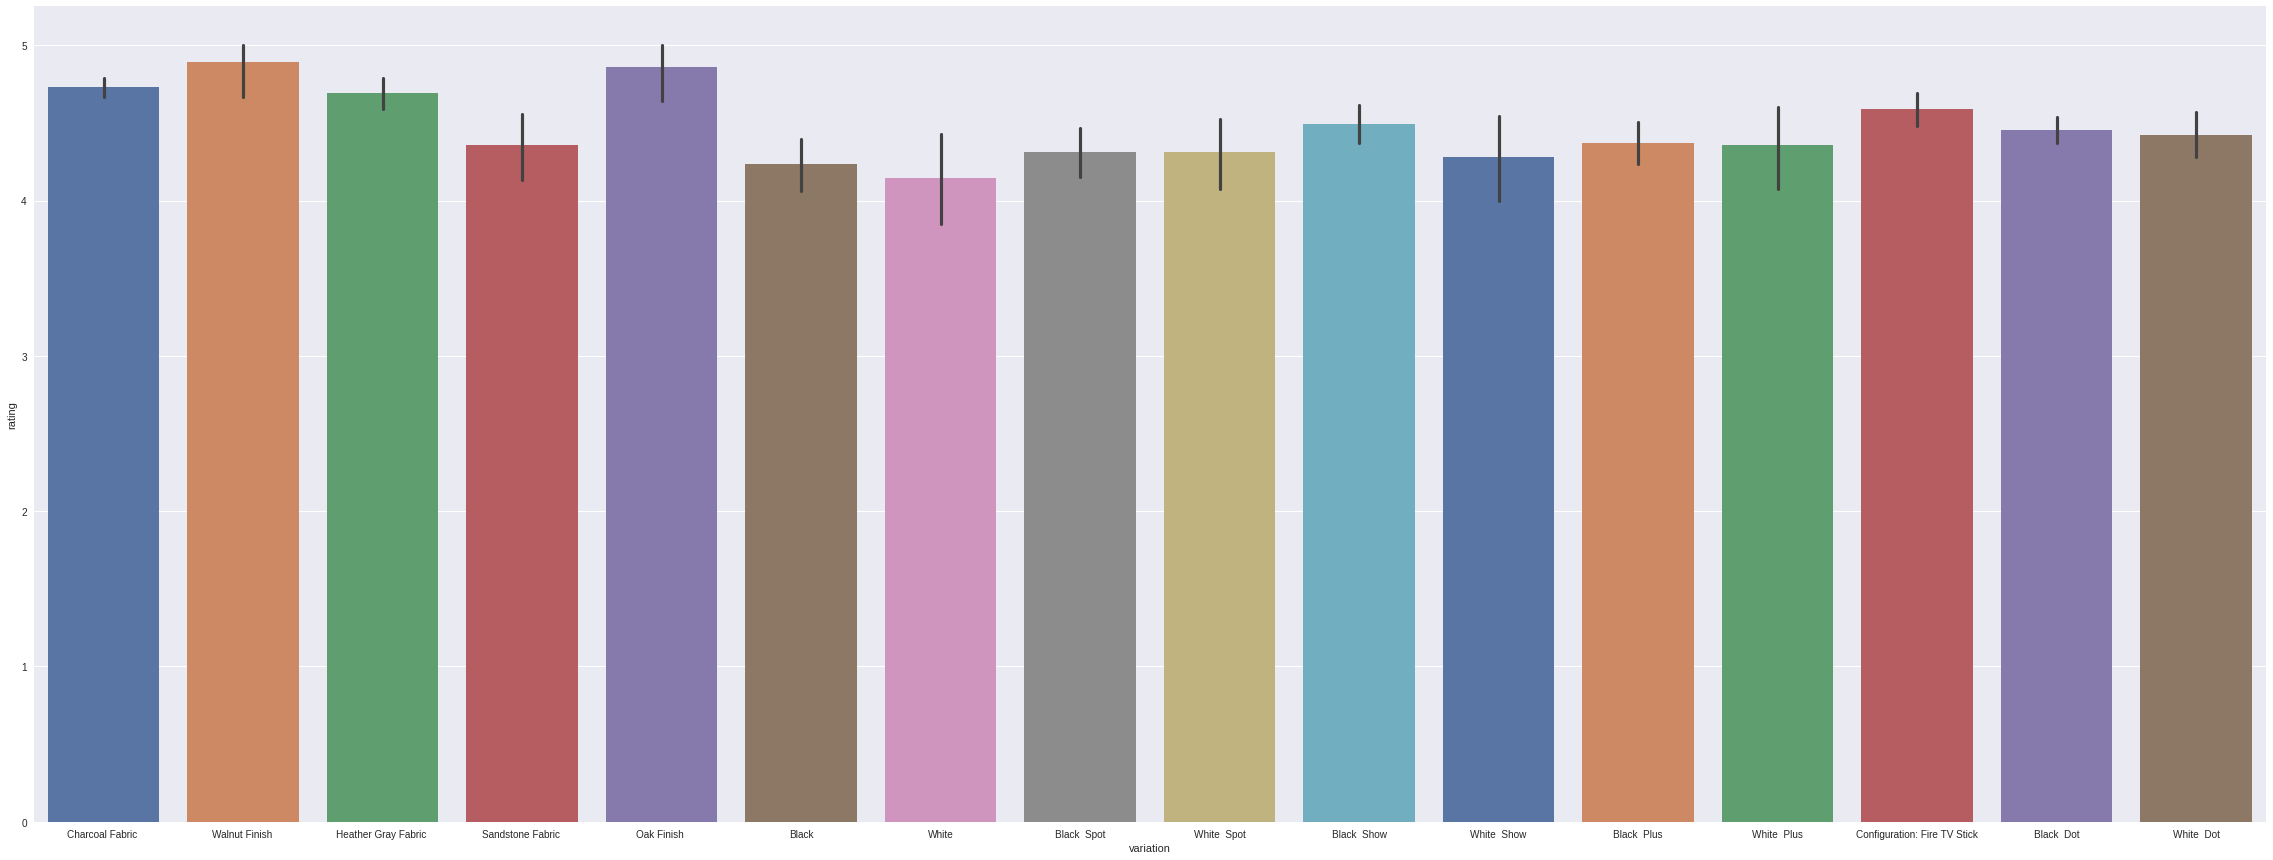

In [280]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')

In [281]:
# help(sns.barplot)

## How to do One-hot encoding when we have a sentence (many words) as column value

we have to use a function called `CountVectorizer` from `sklearn.feature_extraction.text`. 

**The idea behind it**

1. extract unique words from the text.
2. create new columns for each word. 
3. take a sentense and marker the columns where the words are included in the sentence. 
 
Visual example:

[Source](https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e)

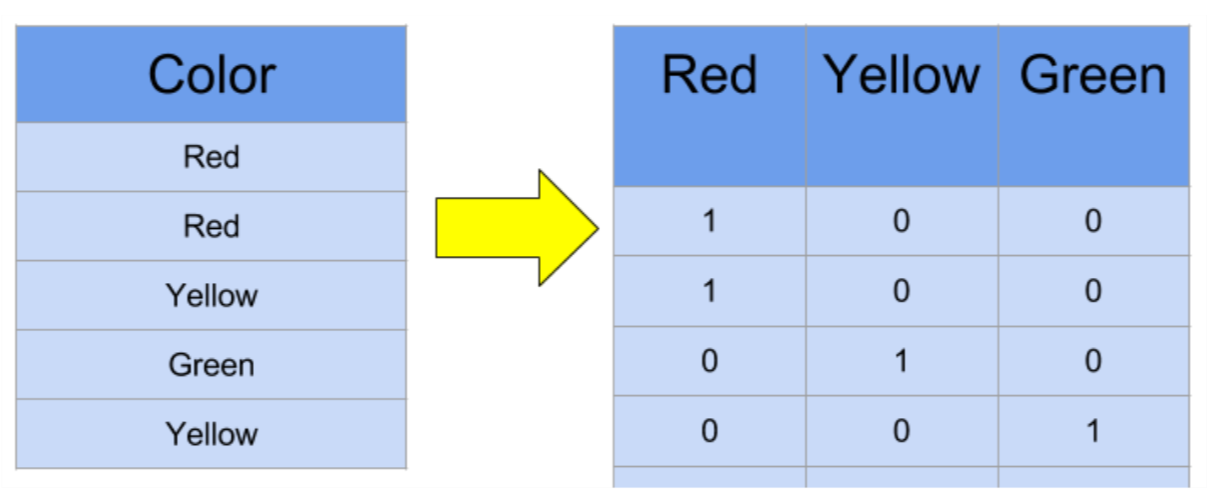

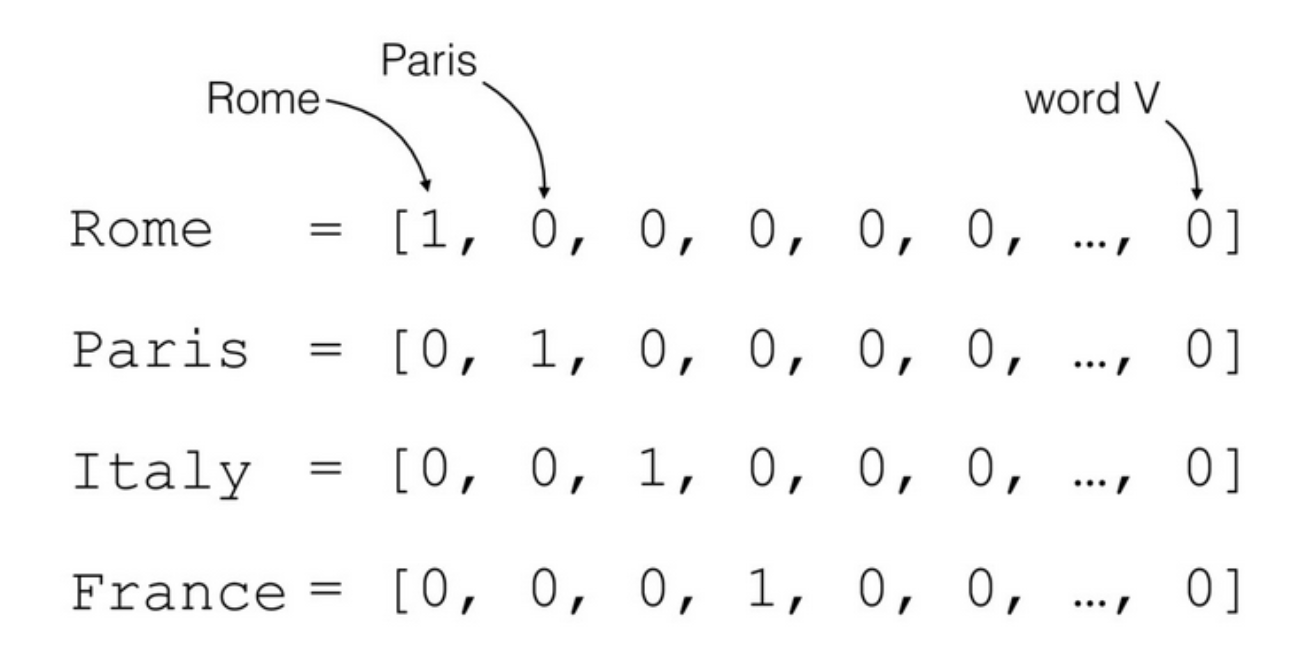

**Example in Python:**

[Source](https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e)

In [282]:
from sklearn.feature_extraction.text import CountVectorizer


# To create a Count Vectorizer, we simply need to instantiate one.
# There are special parameters we can set here when making the vectorizer, but
# for the most basic example, it is not needed.
vectorizer = CountVectorizer()

# For our text, we are going to take some text from our previous blog post
# about count vectorization
sample_text = ["One of the most basic ways we can numerically represent words "
               "is through the one-hot encoding method (also sometimes called "
               "count vectorizing)."]

# To actually create the vectorizer, we simply need to call fit on the text
# data that we wish to fix
vectorizer.fit(sample_text)

# Now, we can inspect how our vectorizer vectorized the text
# This will print out a list of words used, and their index in the vectors
print('Vocabulary: ')
print(vectorizer.vocabulary_)

# If we would like to actually create a vector, we can do so by passing the
# text into the vectorizer to get back counts
vector = vectorizer.transform(sample_text)

# Our final vector:
print('Full vector: ')
print(vector.toarray())

# Or if we wanted to get the vector for one word:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())

# Or if we wanted to get multiple vectors at once to build matrices
print('Hot and one: ')
print(vectorizer.transform(['hot', 'one']).toarray())

# We could also do the whole thing at once with the fit_transform method:
print('One swoop:')
new_text = ['Today is the day that I do the thing today, today']
new_vectorizer = CountVectorizer()
print(new_vectorizer.fit_transform(new_text).toarray())

Vocabulary: 
{'one': 12, 'of': 11, 'the': 15, 'most': 9, 'basic': 1, 'ways': 18, 'we': 19, 'can': 3, 'numerically': 10, 'represent': 13, 'words': 20, 'is': 7, 'through': 16, 'hot': 6, 'encoding': 5, 'method': 8, 'also': 0, 'sometimes': 14, 'called': 2, 'count': 4, 'vectorizing': 17}
Full vector: 
[[1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]
Hot vector: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Hot and one: 
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
One swoop:
[[1 1 1 1 2 1 3]]


# Task #4: Data Cleaning/ Feature Engineering

In [305]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/lagcc_data_analytics_micro_credential/master/Unit%204%20-%20Mahine%20Learning/amazon_alexa.tsv', sep='\t')

**Step 1: Added a `length` column for the length of the review**

In [306]:
df['length'] = df['verified_reviews'].apply(len)

**Step 2: convert `variation` to numerical value**

Drop `date` and `verified_reviews` since `date` is very unlikely to be related to `feedback`  and we cannot use `get_dummies` for `verified_reviews`. Let's put it aside. 

In [307]:
reviews = df['verified_reviews']
df = df.drop(['date','verified_reviews'],axis=1)

In [308]:
df.head()

,rating,variation,feedback,length
0,5,Charcoal Fabric,1,13
1,5,Charcoal Fabric,1,9
2,4,Walnut Finish,1,195
3,5,Charcoal Fabric,1,172
4,5,Charcoal Fabric,1,5


In [309]:
df = pd.get_dummies(df, drop_first = True)

In [310]:
df.head()

,rating,feedback,length,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,5,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,1,195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,1,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


**Step 3: One-hot encoding on `verified_reviews`**

To convert column `verified_reviews` to numberical values, we have to use a function called `CountVectorizer` from `sklearn.feature_extraction.text`. 

In [311]:
vectorizer = CountVectorizer()
vectorizer.fit(reviews)
vector = vectorizer.transform(reviews)

In [312]:
reviews = pd.DataFrame(vector.toarray()) # convert vector to array and then dataframe

In [313]:
df_done = pd.concat([df,reviews], axis=1)
df_done.head()

,rating,feedback,length,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,1,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Establish Baseline**

To accurately evaluate our models, we must establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction can be the category that dominates the dataset. 

For **`feedback`**, that would be positive feedback since about 91% of the data points have positive feedback.

For **`rating`**, that would be five start rating since about 73% of the data points have 5-star ratings. 

Therefore, the scores we get from the model should be greater than 91% when predicting `feedback`, and greater than 73% when predicting `rating`. 



[Source](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)


# **Predict `feedback`**

## Task #5: Model Building and Model Training

In [314]:
# features 
x = df_done.drop(['feedback', 'rating'],axis=1)
# target
y = df_done['feedback']

In [315]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=5)

In [316]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0) # using random forest classifier as model, number of estimators = 100
randomforest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Task #6: Model Evaluation

In [317]:
y_predict = randomforest_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)

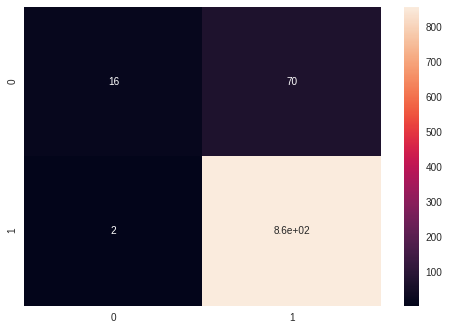

In [318]:
sns.heatmap(cm, annot=True)

In [319]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.19      0.31        86
           1       0.92      1.00      0.96       859

    accuracy                           0.92       945
   macro avg       0.91      0.59      0.63       945
weighted avg       0.92      0.92      0.90       945



Sadly, the score we got is around 92% which is only 1% better than the baseline. 

## Task #7 Model Performance Improvement/ feature selection

Finding important features in Scikit-learn

In [320]:
import pandas as pd
feature_imp = pd.Series(randomforest_classifier.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_imp)

length    0.043898
2396      0.022266
2150      0.019383
1589      0.012913
375       0.010206
            ...   
1389      0.000000
3069      0.000000
3068      0.000000
1394      0.000000
2013      0.000000
Length: 4060, dtype: float64


top 20 most import features


In [321]:
feature_imp.index[0:20]

Index([                    'length',                         2396,
                               2150,                         1589,
                                375,                         1933,
                               3991,                         3416,
                               3987,                         3578,
                               3646,                         1016,
       'variation_Charcoal Fabric ',                          661,
                               1158,       'variation_Black  Dot',
                               2383,                         3601,
                               2320,                         2993],
      dtype='object')

Let's use only the top 20 most important features to train the model

In [322]:
df_20 = df_done[['length',                         2396,
                               2150,                         1589,
                                375,                         1933,
                               3991,                         3416,
                               3987,                         3578,
                               3646,                         1016,
       'variation_Charcoal Fabric ',                          661,
                               1158,       'variation_Black  Dot',
                               2383,                         3601,
                               2320,                         2993]]

In [323]:
df_20.head()

,length,2396,2150,1589,375,1933,3991,3416,3987,3578,3646,1016,variation_Charcoal Fabric,661,1158,variation_Black Dot,2383,3601,2320,2993
0,13,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,195,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,172,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
4,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.70      0.41      0.51        69
           1       0.95      0.99      0.97       876

    accuracy                           0.94       945
   macro avg       0.83      0.70      0.74       945
weighted avg       0.94      0.94      0.94       945



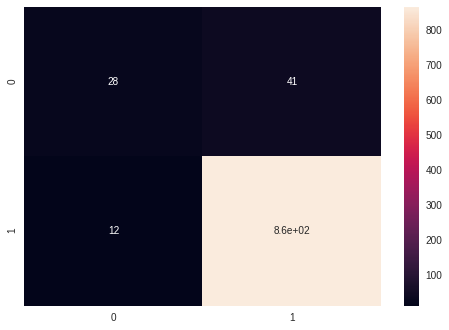

In [324]:
x_train, x_test, y_train, y_test = train_test_split(df_20, df['feedback'], test_size = 0.30)

randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(x_train, y_train)
y_predict = randomforest_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

When only using 20 features, the score went up by about 2%. Recall that the score was around 92% with 4061 features. This is a large improvement. To run a model with 4061 features is time-consuming, we should always do feature selection whenever possible. 

## Learning curve

I think that a larger dataset may improve the model even more. Let's take a look at learning curve.


In [325]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 300, 500, 800,1000, 1500,2000, 2400]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(),
X = x,
y = y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [326]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
100    -0.000000
300    -0.000000
500    -0.000000
800     0.002500
1000    0.002400
1500    0.004000
2000    0.005100
2400    0.005333
dtype: float64

 --------------------

Mean validation scores

 1       0.249206
100     0.081270
300     0.076190
500     0.087937
800     0.075873
1000    0.076190
1500    0.075556
2000    0.077143
2400    0.079365
dtype: float64


(Text(0.5, 0, 'Training set size'),
 Text(0.5, 1.03, 'Learning curves for a random forest regression model'),
 <matplotlib.legend.Legend at 0x7f929b3cd4e0>)

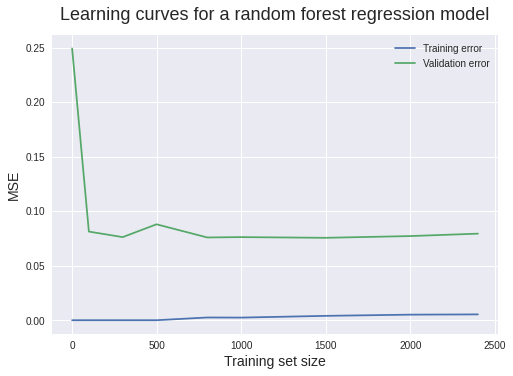

In [327]:
plt.style.use('seaborn'),plt.plot(train_sizes, train_scores_mean, label = 'Training error'), plt.plot(train_sizes, validation_scores_mean, label = 'Validation error'),plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14),plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03),plt.legend()

Below shows two cases of learning curve. If we have the one on the right, adding more data will likely improve the model.

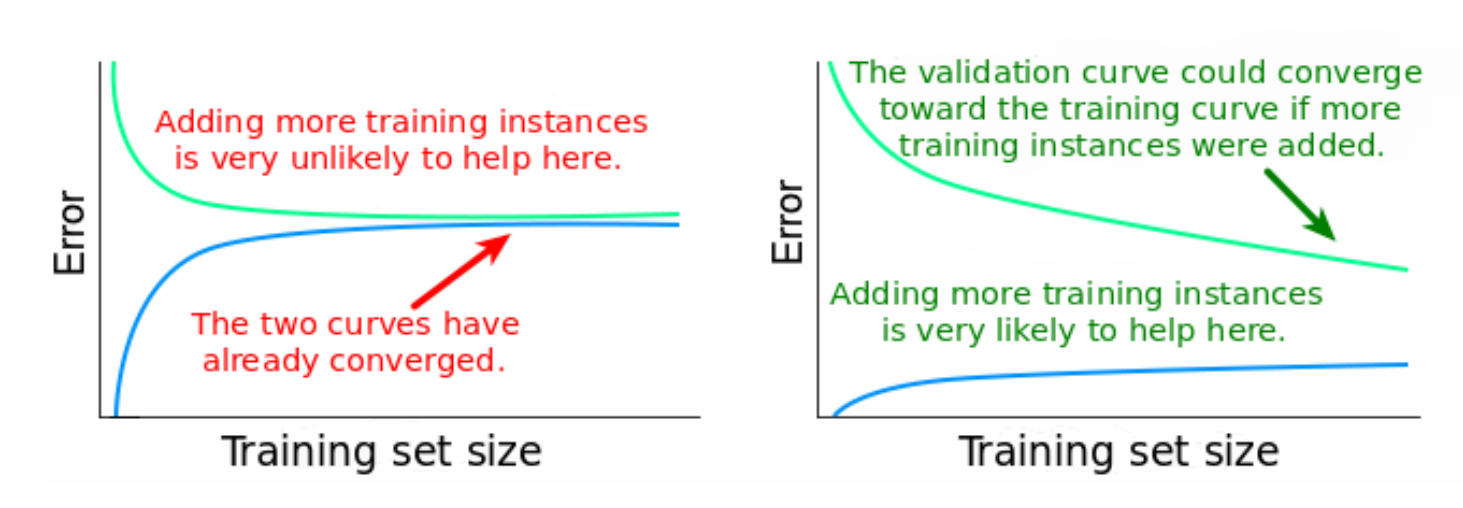

From our learning curve, we believe that adding more data will improve the model. 

[See detailed learning curve explantion](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

# Predict `rating`


## Task #5: Model Building and Model Training

In [328]:
# features 
x = df_done.drop(['feedback', 'rating'],axis=1)
# target
y = df_done['rating']

In [329]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=5)

In [330]:
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy') # using random forest classifier as model, number of estimators = 100
randomforest_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Task #6: Model Evaluation

In [331]:
y_predict = randomforest_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)

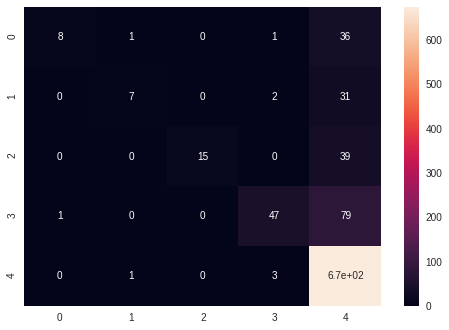

In [332]:
sns.heatmap(cm, annot=True)

In [333]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.89      0.17      0.29        46
           2       0.78      0.17      0.29        40
           3       1.00      0.28      0.43        54
           4       0.89      0.37      0.52       127
           5       0.78      0.99      0.88       678

    accuracy                           0.79       945
   macro avg       0.87      0.40      0.48       945
weighted avg       0.82      0.79      0.75       945



The score we got is around 80%, which is 7% better than the baseline. We are making progress. 

## Task #7 Model Performance Improvement 

Finding important features in Scikit-learn

In [334]:
feature_imp = pd.Series(randomforest_classifier.feature_importances_,index=x.columns).sort_values(ascending=False)
print(feature_imp)

length    0.045914
2150      0.019894
1933      0.014639
2396      0.013677
3578      0.012888
            ...   
1535      0.000000
1537      0.000000
1538      0.000000
3490      0.000000
2013      0.000000
Length: 4060, dtype: float64


In [335]:
# Top 20 most important features
print(feature_imp.index[0:20])

Index([                                'length',
                                           2150,
                                           1933,
                                           2396,
                                           3578,
                                           3646,
                                           1589,
                                            250,
                                            559,
                         'variation_Black  Dot',
                                           1923,
                   'variation_Charcoal Fabric ',
       'variation_Configuration: Fire TV Stick',
                                           2320,
                                           3576,
                                           3896,
                         'variation_White  Dot',
                                           2428,
                                           1098,
                                           3987],
      dtype='object

Let's use only the top 20 most important features to train the model

In [336]:
df_20 = df_done[['length',
                                           2150,
                                           2396,
                                           1933,
                                           3578,
                                           3646,
                                           1589,
                                            250,
                                            559,
                                           1923,
                                           2320,
                                           3576,
                         'variation_Black  Dot',
                   'variation_Charcoal Fabric ',
       'variation_Configuration: Fire TV Stick',
                         'variation_White  Dot',
                                           3308,
                                           3896,
                                           1561,
                                           2076]]

In [337]:
df_20.head()

,length,2150,2396,1933,3578,3646,1589,250,559,1923,2320,3576,variation_Black Dot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_White Dot,3308,3896,1561,2076
0,13,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,195,0,0,1,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,1
3,172,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


              precision    recall  f1-score   support

           1       0.75      0.20      0.32        59
           2       0.54      0.28      0.37        25
           3       0.82      0.38      0.52        47
           4       0.59      0.40      0.47       144
           5       0.80      0.95      0.87       670

    accuracy                           0.77       945
   macro avg       0.70      0.44      0.51       945
weighted avg       0.76      0.77      0.74       945



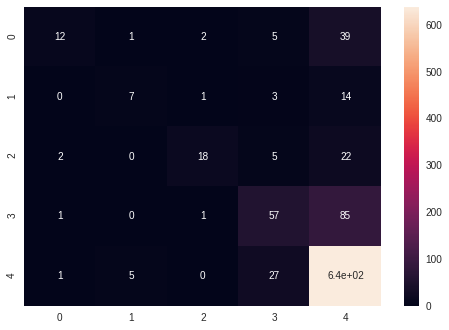

In [338]:
x_train, x_test, y_train, y_test = train_test_split(df_20, df['rating'], test_size = 0.30)

randomforest_classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(x_train, y_train)
y_predict = randomforest_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

When only using 20 features, we got scores very close to the scores we got with 4061 features. This is a large improvement. To run a model with 4061 features is time-consuming, we should always do feature selection whenever possible. 

## Learning curve


In [339]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 300, 500, 800,1000, 1500,2000, 2400]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(),
X = x,
y = y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [340]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis =1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
100    -0.000000
300     0.016000
500     0.012000
800     0.041750
1000    0.049200
1500    0.072667
2000    0.079800
2400    0.083583
dtype: float64

 --------------------

Mean validation scores

 1       3.776190
100     1.436825
300     1.327619
500     1.436825
800     1.315873
1000    1.266667
1500    1.285079
2000    1.368889
2400    1.306667
dtype: float64


(Text(0.5, 0, 'Training set size'),
 Text(0.5, 1.03, 'Learning curves for a random forest regression model'),
 <matplotlib.legend.Legend at 0x7f929b1a6240>)

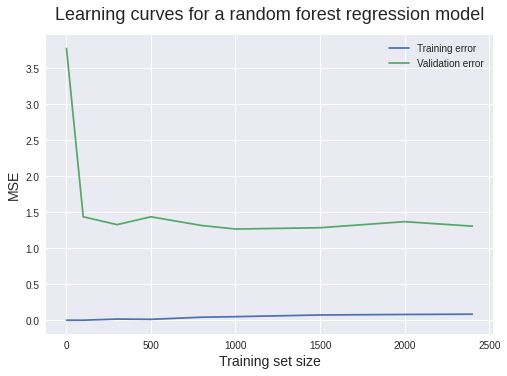

In [341]:
plt.style.use('seaborn'),plt.plot(train_sizes, train_scores_mean, label = 'Training error'), plt.plot(train_sizes, validation_scores_mean, label = 'Validation error'),plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14),plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03),plt.legend()

I got similar graph as before. We should get more data and test it out. 

# Conclusion

1. I don't know why we were guided to predict feedback. Feedbacks are determined by ratings. Any rating that is above 3 (including 3) is considered as positive feedback, and any rating that is below 3 is considered as negative feedback

2. Our models are not much better than guessing the dominated values. By looking at learning curves, we believe that more data points will help on making a better model.  

3. When doing feature selection, we know that certain words are linked to positive feedback and others are linked to negative feedback. In the future study, we would want to look into the algorithm and find out what are those words. 


What I have learned: 

1. From this notebook, I learned how to do one-hot encoding with sentences using `CountVectorizer`. 